<a href="https://colab.research.google.com/github/rzqmhb/PCVK_Ganjil_2023/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan seperti biasa.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##2. Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

In [ ]:
def faceDetection(img, cascade):
  copy = img.copy()
  roi_wajah = cascade.detectMultiScale(img)
  for(x,y,w,h) in roi_wajah:
    cv.rectangle(copy,(x,y),(x+w,y+h),(0,255,255),3)

  plt.figure(figsize = (10,10))
  plt.subplot(121)
  plt.imshow(img)

  plt.subplot(122)
  plt.imshow(copy)


In [ ]:
path = "/content/drive/MyDrive/Kuliah_SMT_5/PCVK/dataset/haarcascades/haarcascade_frontalface_alt.xml"
humanCascade = cv.CascadeClassifier(path)

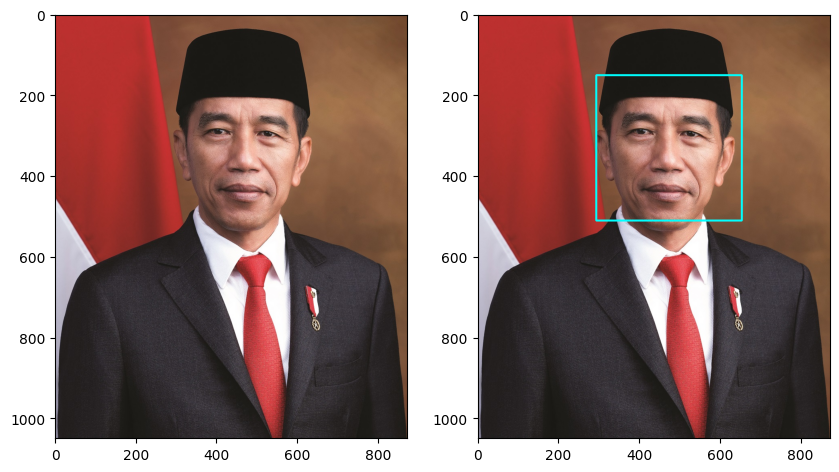

In [ ]:
jokowi = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/dataset/facedet/jokowi.jpg')
jokowi = cv.cvtColor(jokowi, cv.COLOR_BGR2RGB)
faceDetection(jokowi, humanCascade)

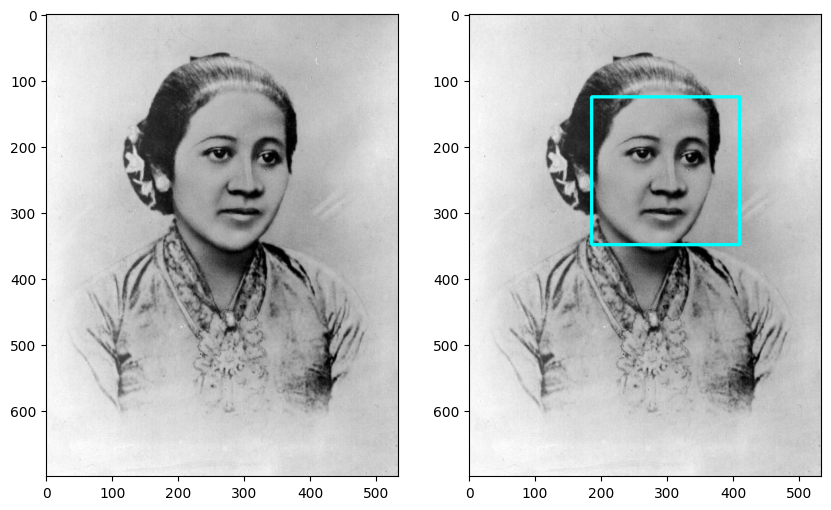

In [ ]:
kartini = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/dataset/facedet/kartini.jpg')
kartini = cv.cvtColor(kartini, cv.COLOR_BGR2RGB)
faceDetection(kartini, humanCascade)

In [ ]:
catCascade = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/dataset/haarcascades/haarcascade_frontalcatface.xml')

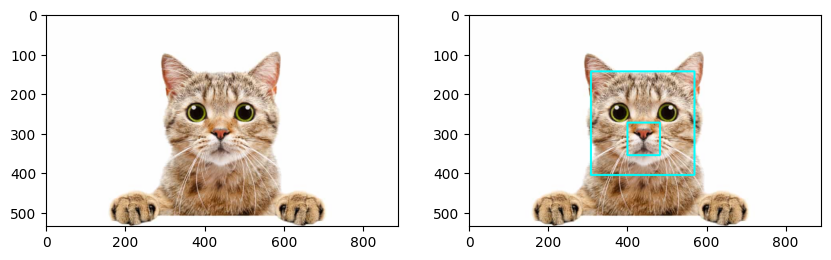

In [ ]:
kucing = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/dataset/facedet/kucing.jpg')
kucing = cv.cvtColor(kucing, cv.COLOR_BGR2RGB)
faceDetection(kucing, catCascade)

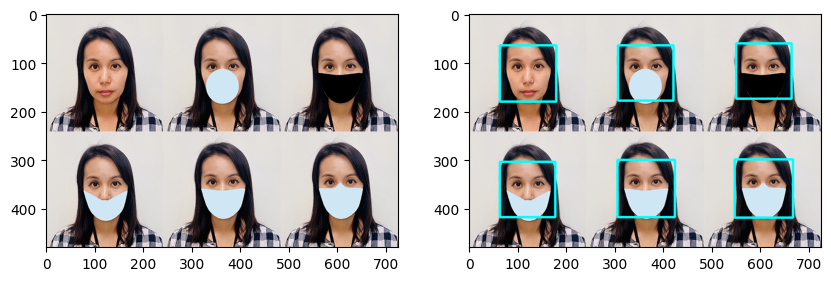

In [ ]:
mask = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/dataset/facedet/mask.png')
mask = cv.cvtColor(mask, cv.COLOR_BGR2RGB)
faceDetection(mask, humanCascade)

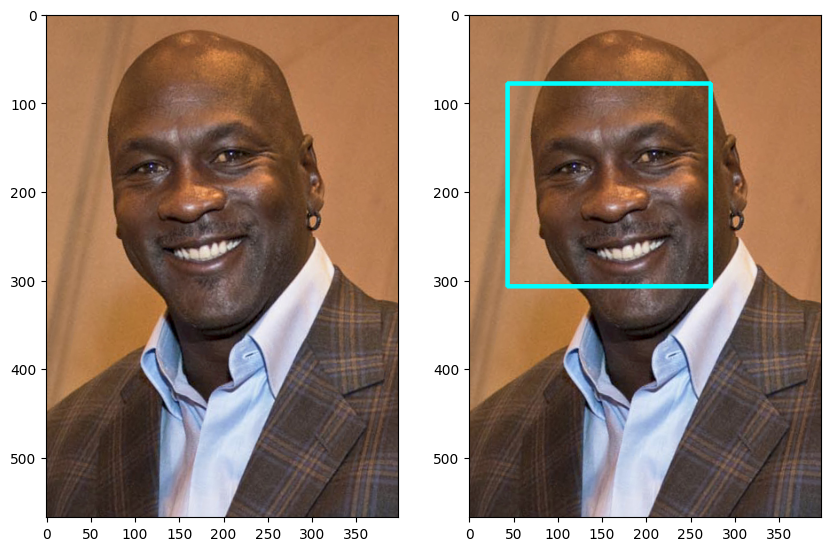

In [ ]:
mjordan = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/dataset/facedet/mjordan.jpg')
mjordan = cv.cvtColor(mjordan, cv.COLOR_BGR2RGB)
faceDetection(mjordan, humanCascade)

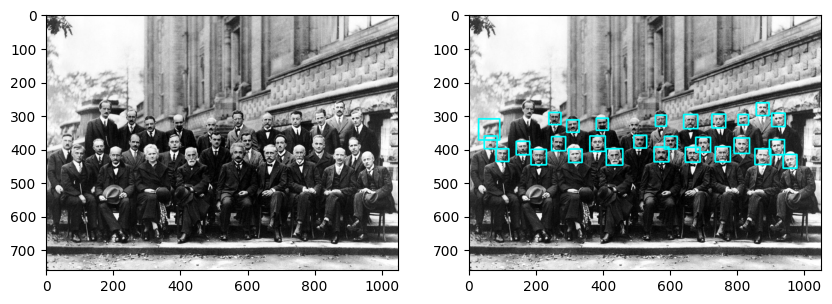

In [ ]:
solvayconf = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/dataset/facedet/solvayconf.jpg')
solvayconf = cv.cvtColor(solvayconf, cv.COLOR_BGR2RGB)
faceDetection(solvayconf, humanCascade)

##3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini, perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui search engines.


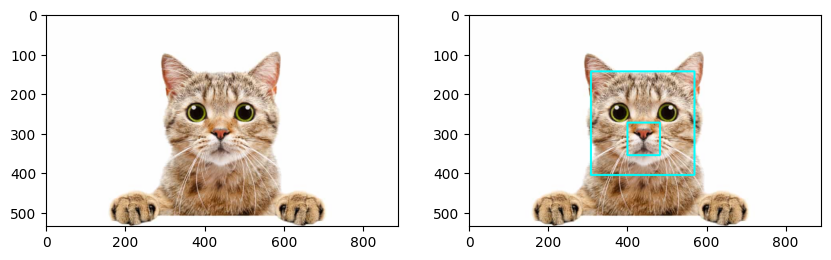

In [ ]:
catCascade = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/dataset/haarcascades/haarcascade_frontalcatface.xml')
kucing = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/dataset/facedet/kucing.jpg')
kucing = cv.cvtColor(kucing, cv.COLOR_BGR2RGB)
faceDetection(kucing, catCascade)

##4. Cobakan juga untuk eyes detection

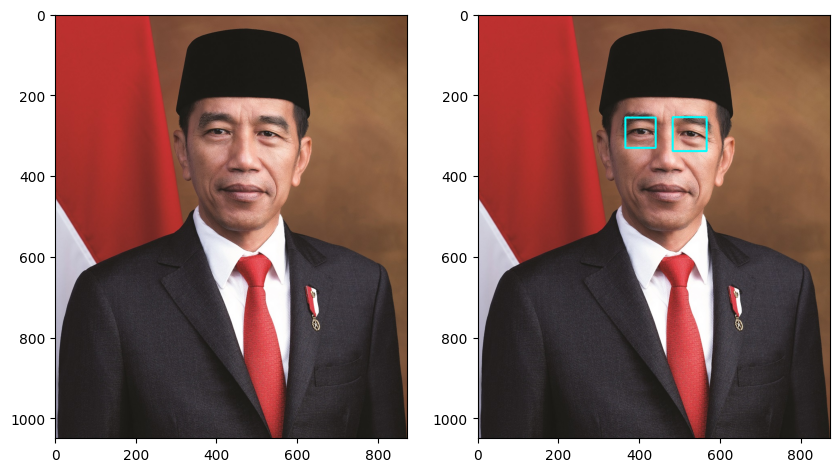

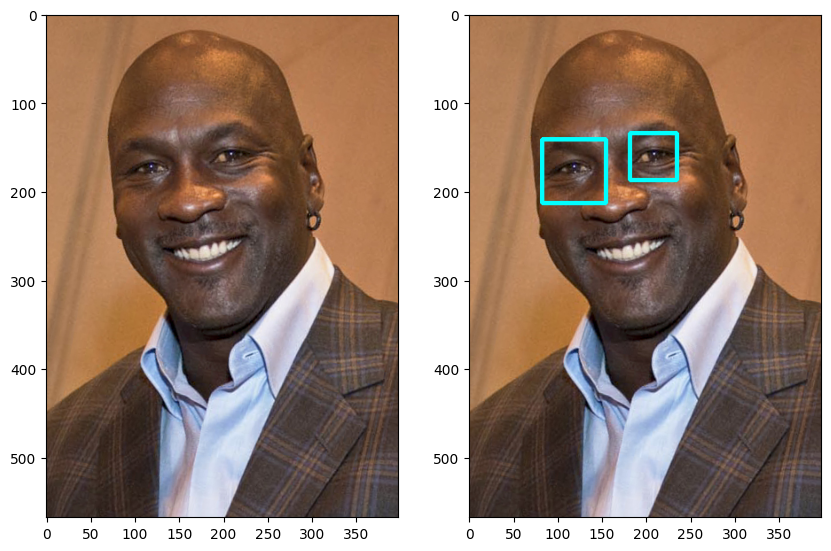

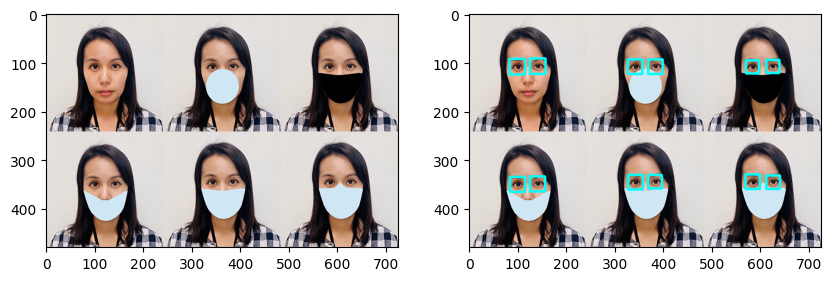

In [ ]:
eyeCascade = cv.CascadeClassifier('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/dataset/haarcascades/haarcascade_eye.xml')
faceDetection(jokowi, eyeCascade)
faceDetection(mjordan, eyeCascade)
faceDetection(mask, eyeCascade)

##5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

#### Import Library

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

#### Helper Function

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

Webcam Image

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = humanCascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


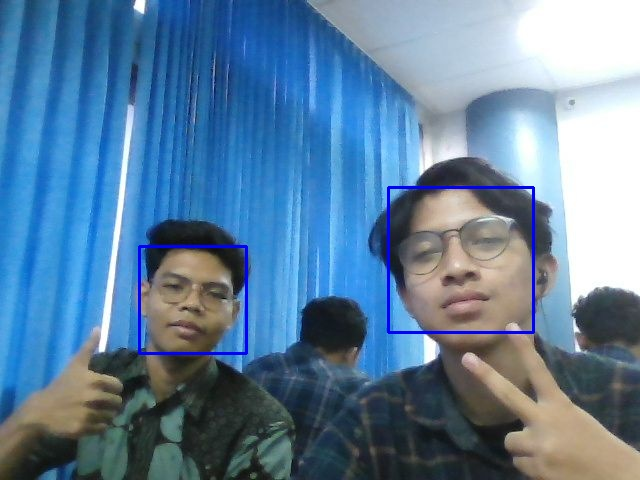

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

#### Webcam Video

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = humanCascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>

## 6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

In [ ]:
def faceBlur(img, cascade):
  copy = img.copy()
  roi_wajah = cascade.detectMultiScale(img)
  for(x,y,w,h) in roi_wajah:
    face = copy[y:y+h, x:x+w]
    blurred_face = cv2.medianBlur(face, 23)
    copy[y:y+h, x:x+w] = blurred_face

  plt.figure(figsize = (10,10))
  plt.subplot(121)
  plt.imshow(img)

  plt.subplot(122)
  plt.imshow(copy)

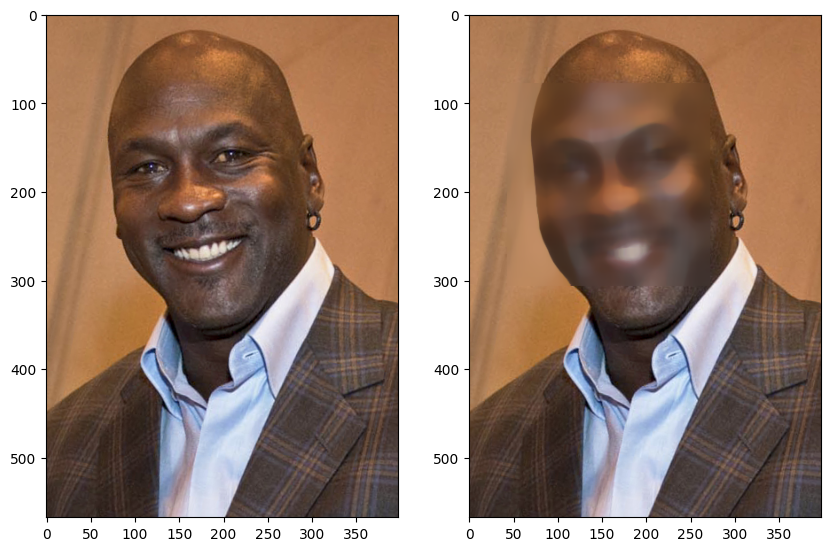

In [ ]:
mjordan = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/dataset/facedet/mjordan.jpg')
mjordan = cv.cvtColor(mjordan, cv.COLOR_BGR2RGB)
faceBlur(mjordan, humanCascade)

## 7. Lakukan segmentasi karakter pada KTP

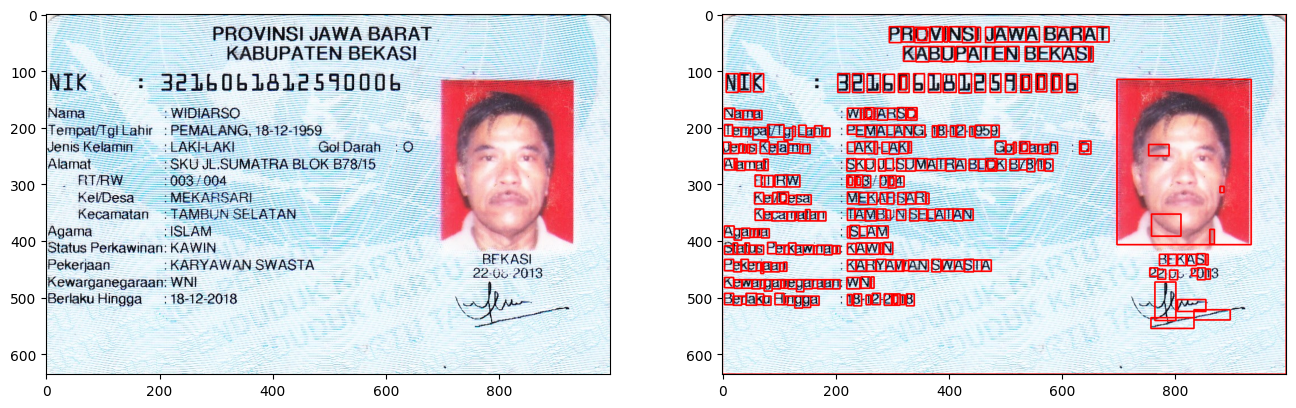

In [ ]:
from google.colab.patches import cv2_imshow

ktp = cv2.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/ktp/ktp6.png')
blurred = cv2.GaussianBlur(ktp, (5,5), 0.5)
sharpened = cv2.addWeighted(ktp, 1.5, blurred,-0.5,0)
# cv2_imshow(sharpened)

gray = cv2.cvtColor(sharpened, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((2,2),np.uint8)
closing = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)
  if(w>3 and h>10):
    result = cv2.rectangle(ktp, (x, y), (x+w, y+h),(0,0,255),2)

# cv2_imshow(result)
plt.figure(figsize = (16,16))
plt.subplot(121)
plt.imshow(cv2.cvtColor(sharpened, cv.COLOR_BGR2RGB))

plt.subplot(122)
plt.imshow(cv2.cvtColor(result, cv.COLOR_BGR2RGB))

##8. Lakukan cropping pada bagian NIK saja

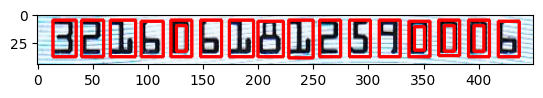

In [ ]:
crop = result[100:145, 190:640]
plt.imshow(cv2.cvtColor(crop, cv.COLOR_BGR2RGB))

##9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya gunakan source code di bawah ini untuk proses persiapan untuk training.

In [ ]:
import os
from tqdm import tqdm
import cv2
import random
import numpy as np
import pickle
from google.colab.patches import cv2_imshow

# Direktori data training
DATADIR = "/content/drive/MyDrive/Kuliah_SMT_5/PCVK/angka_ktp/"
dirs = []
training_data = []
width, height = 100, 100

# Looping direktori data training untuk diambil nama karakternya
for char_name in sorted(os.listdir(DATADIR)):
  dirs.append(char_name)

# Looping semua image data training untuk diubah menjadi array
for char_name in dirs:
  path = os.path.join(DATADIR, char_name)
  class_number = dirs.index(char_name)
  for img in tqdm(os.listdir(path)):
    try:
      img_array = cv2.imread((os.path.join(path, img)), cv2.IMREAD_ANYCOLOR)
      # gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
      new_array = cv2.resize(img_array, (width, height))
      training_data.append([new_array, class_number])
    except Exception as e:
      print(e)

random.shuffle(training_data)
X = []
Y = []

for feature, label in training_data:
  X.append(feature)
  Y.append(label)

X = np.array(X).reshape(-1, width, height, 3)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

100%|██████████| 4/4 [00:00<00:00, 66.87it/s]


In [ ]:
print(len(X))

54


##10. Lakukan Training Data


In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical

# Load file pickle
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)
pickle_in = open("Y.pickle", "rb")
Y = pickle.load(pickle_in)
Y = to_categorical(Y)
X = X / 255.0
width, height = 100, 100

# Input layer
inputs = Input(shape=(width, height, 3))
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)
conv_layer = Conv2D(64, (3, 3), strides=(1, 1),
activation='relu')(conv_layer)
flaten = Flatten()(conv_layer)
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer
outputs = Dense(10, activation='softmax')(fc_layer)
adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X, Y, epochs=20, verbose=1)
model.save('anpr.model')

Epoch 1/20
2/2 [==============================] - 4s 396ms/step - loss: 2.3429 - accuracy: 0.0185
Epoch 2/20
2/2 [==============================] - 1s 372ms/step - loss: 2.2501 - accuracy: 0.2037
Epoch 3/20
2/2 [==============================] - 1s 339ms/step - loss: 2.1952 - accuracy: 0.2778
Epoch 4/20
2/2 [==============================] - 1s 352ms/step - loss: 2.1319 - accuracy: 0.3519
Epoch 5/20
2/2 [==============================] - 1s 376ms/step - loss: 2.0552 - accuracy: 0.4630
Epoch 6/20
2/2 [==============================] - 1s 358ms/step - loss: 1.9562 - accuracy: 0.5370
Epoch 7/20
2/2 [==============================] - 1s 383ms/step - loss: 1.8392 - accuracy: 0.5741
Epoch 8/20
2/2 [==============================] - 1s 356ms/step - loss: 1.6985 - accuracy: 0.6852
Epoch 9/20
2/2 [==============================] - 1s 354ms/step - loss: 1.5648 - accuracy: 0.6667
Epoch 10/20
2/2 [==============================] - 1s 350ms/step - loss: 1.3759 - accuracy: 0.7778
Epoch 11/20
2/2 [==

## 11. Testing Data

###Note : Karena data test adalah nik dari ktp yang merupakan bagian dari tugas kelompok, saya menganggap tugas kelompok diselesaikan bersamaan dengan melakukan testing model

Kelompok 5 :
1. Amalia Salsa Lutfiana (04)
2. Maulidio Farhan Rizkullah (19)
3. Raden Rizki (25)
4. Roziq Mahbubi (27)
5. Yofandra Arta Priyoga (30)

In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np

data_dir_training = "/content/drive/MyDrive/Kuliah_SMT_5/PCVK/angka_ktp"
data_dir_testing = "/content/drive/MyDrive/Kuliah_SMT_5/PCVK/nik_testing"
dirs = []
width, height = 100, 100

model = tf.keras.models.load_model("anpr.model")

for char_name in sorted(os.listdir(data_dir_training)):
  dirs.append(char_name)

for car in sorted(os.listdir(data_dir_testing)):
  temp = ""
  for char_img in sorted(os.listdir(os.path.join(data_dir_testing, car))):
    img_array = cv2.imread(os.path.join(data_dir_testing, car, char_img), cv2.IMREAD_ANYCOLOR)
    new_array = cv2.resize(img_array, (width, height))
    new_array = np.array(new_array).reshape(-1, width, height, 3)
    new_array = new_array / 255.0
    prediction = model.predict(new_array)
    temp += dirs[np.argmax(prediction[0])]

  print("folder name: {} no: {}".format(car, temp))

1/1 [==============================] - 0s 161ms/step
folder name: index0_3 no: 3
1/1 [==============================] - 0s 43ms/step
folder name: index10_5 no: 5
1/1 [==============================] - 0s 40ms/step
folder name: index11_9 no: 9
1/1 [==============================] - 0s 38ms/step
folder name: index12_0 no: 0
1/1 [==============================] - 0s 27ms/step
folder name: index13_0 no: 0
1/1 [==============================] - 0s 26ms/step
folder name: index14_0 no: 0
1/1 [==============================] - 0s 111ms/step
folder name: index15_6 no: 6
1/1 [==============================] - 0s 26ms/step
folder name: index1_2 no: 2
1/1 [==============================] - 0s 93ms/step
folder name: index2_1 no: 1
1/1 [==============================] - 0s 29ms/step
folder name: index3_6 no: 6
1/1 [==============================] - 0s 28ms/step
folder name: index4_0 no: 0
1/1 [==============================] - 0s 27ms/step
folder name: index5_6 no: 6
1/1 [===========================